# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
City not found. Skipping...
Processing Record 2 of Set 1 | sassandra
City not found. Skipping...
Processing Record 3 of Set 1 | albany
City not found. Skipping...
Processing Record 4 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 6 of Set 1 | valparaiso
City not found. Skipping...
Processing Record 7 of Set 1 | hwange
City not found. Skipping...
Processing Record 8 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 9 of Set 1 | keuruu
City not found. Skipping...
Processing Record 10 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 11 of Set 1 | kaitangata
City not found. Skipping...
Processing Record 12 of Set 1 | mtambile
City not found. Skipping...
Processing Record 13 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 14 of Set 1 | mataura
City 

In [7]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

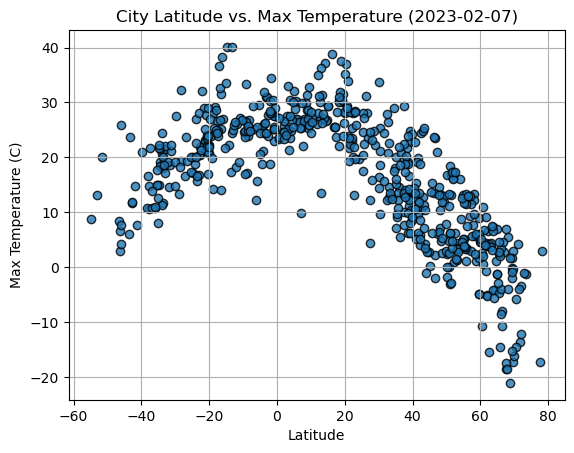

In [8]:
# Build scatter plot for latitude vs. temperature
latitude_values = city_data_df["Lat"]
temperature_values = city_data_df["Max Temp"]
Fig1 = plt.scatter(latitude_values, temperature_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output/Figure1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

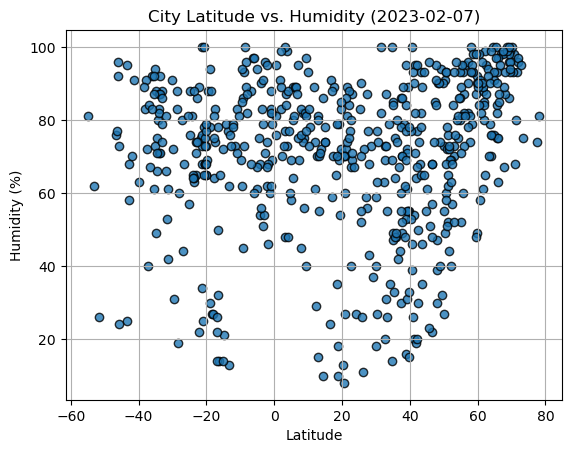

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude_values = city_data_df["Lat"]
humidity_values = city_data_df["Humidity"]
Fig2 = plt.scatter(latitude_values, humidity_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output/Figure2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

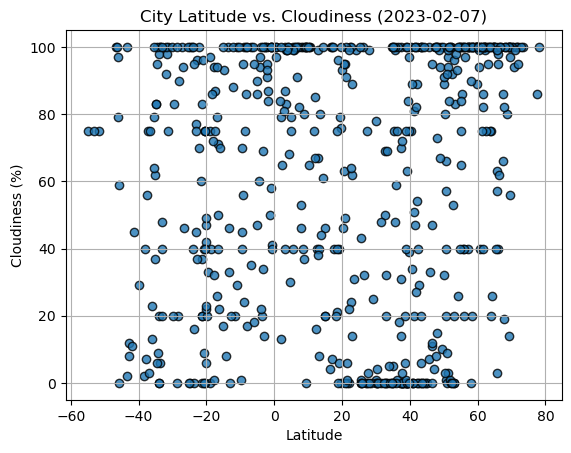

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude_values = city_data_df["Lat"]
cloudiness_values = city_data_df["Cloudiness"]
Fig3 = plt.scatter(latitude_values, cloudiness_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output/Figure3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

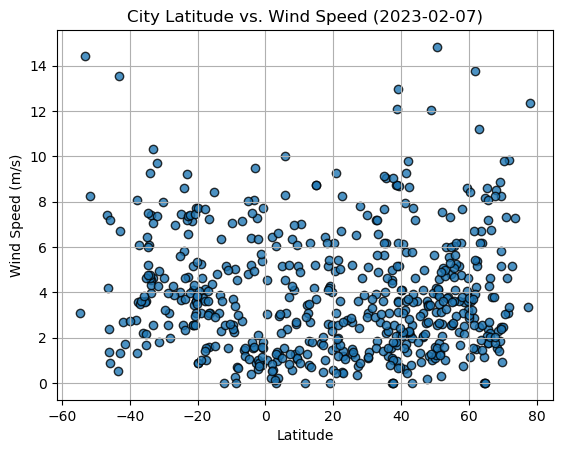

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude_values = city_data_df["Lat"]
wind_values = city_data_df["Wind Speed"]
Fig4 = plt.scatter(latitude_values, wind_values, edgecolors="black", linewidths=1, alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output/Figure4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x_values, y_values, title, x_label, y_label, text_coord):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    plt.annotate(line_eq, text_coord, fontsize=15, color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    print(f"The r-value is: {r_value}")

    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8462548186825359


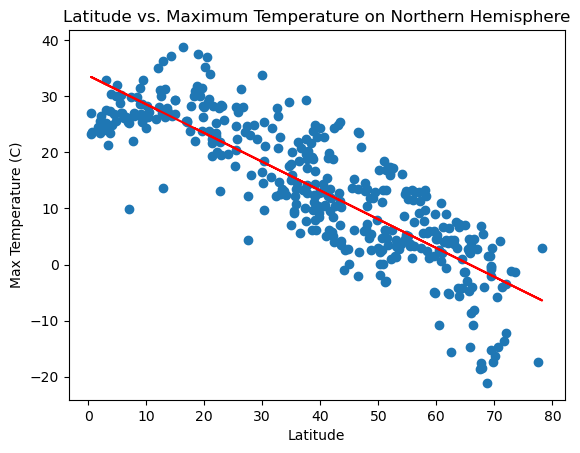

In [15]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

Figure5 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Northern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (10,-30))

The r-value is: 0.6419546065421794


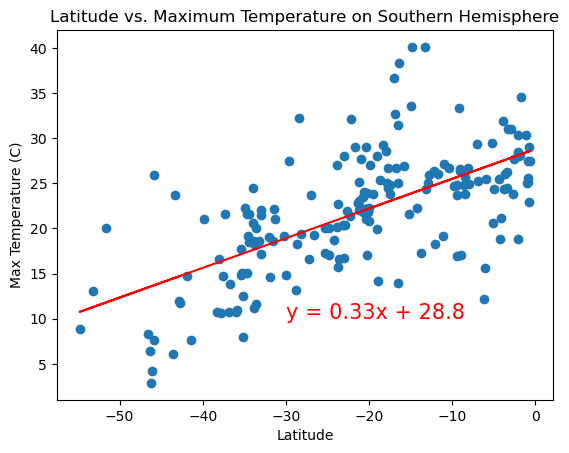

In [16]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

Figure6 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Maximum Temperature on Southern Hemisphere",
                              "Latitude",
                              "Max Temperature (C)",
                              (-30,10))

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23853179129394048


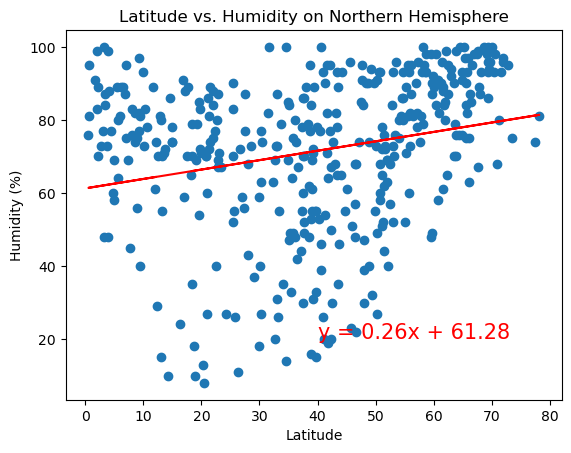

In [17]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

Figure7 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Northern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (40,20))

The r-value is: 0.016759316950056783


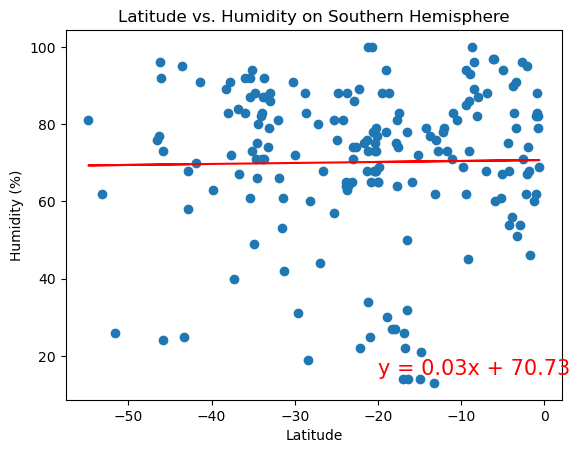

In [18]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


Figure8 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Humidity on Southern Hemisphere",
                              "Latitude",
                              "Humidity (%)",
                              (-20,15))

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15500489387697097


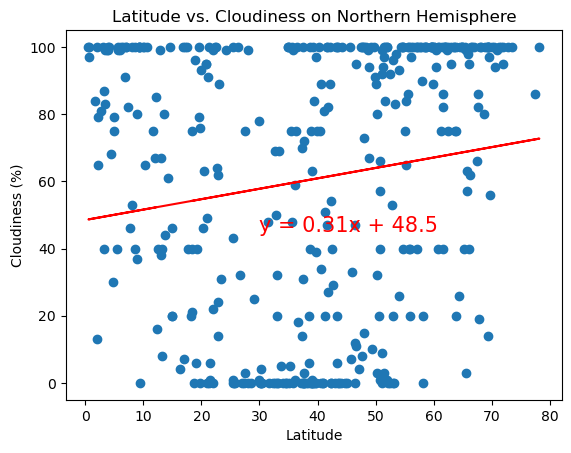

In [19]:
# Northern Hemisphere

# Define x-values and y-values for the plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function to plot the linear regression
Figure9 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Northern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (30,45))

The r-value is: 0.14341322916643248


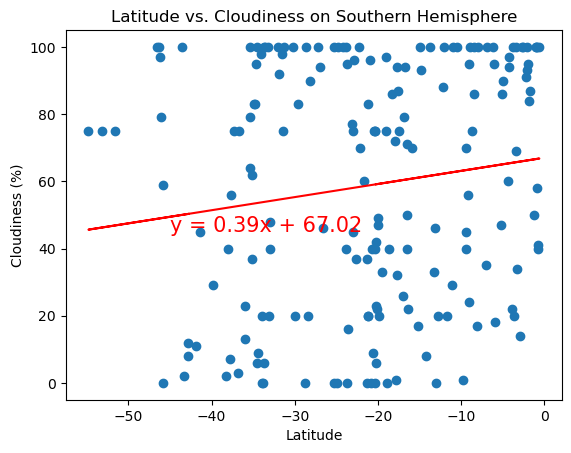

In [20]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

Figure10 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Cloudiness on Southern Hemisphere",
                              "Latitude",
                              "Cloudiness (%)",
                              (-45,45))

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17434667290903338


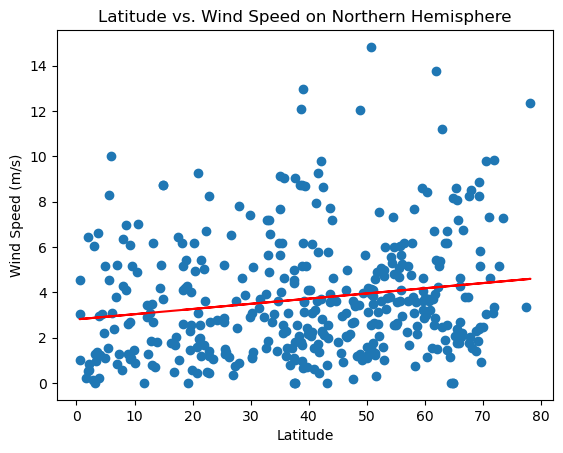

In [21]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

Figure11 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Northern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (30,50))

The r-value is: -0.24947753546264592


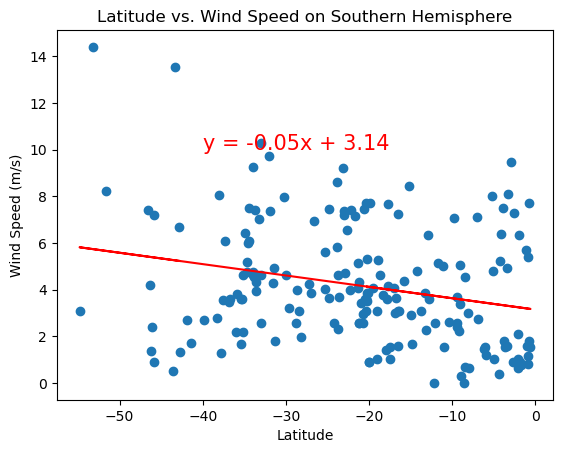

In [22]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

Figure12 = linear_regression_plot(x_values, y_values,
                              "Latitude vs. Wind Speed on Southern Hemisphere",
                              "Latitude",
                              "Wind Speed (m/s)",
                              (-40,10))